In [ ]:
import numpy as np
from numpy import sqrt, mean, absolute
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Dataset



##training

In [ ]:
df = pd.read_excel('train_brownies.xlsx', engine='openpyxl')
df

,bln-1,bln-2,bln-3,bln-4,bln-5,bln-6,bln-7,bln-8,bln-9,bln-10,bln-11,bln-12,target
0,86,94,87,75,87,94,84,79,75,89,93,73,79
1,94,87,75,87,94,84,79,75,89,93,73,79,80
2,87,75,87,94,84,79,75,89,93,73,79,80,77
3,75,87,94,84,79,75,89,93,73,79,80,77,90
4,87,94,84,79,75,89,93,73,79,80,77,90,73
5,94,84,79,75,89,93,73,79,80,77,90,73,84
6,84,79,75,89,93,73,79,80,77,90,73,84,74
7,79,75,89,93,73,79,80,77,90,73,84,74,93
8,75,89,93,73,79,80,77,90,73,84,74,93,86
9,89,93,73,79,80,77,90,73,84,74,93,86,80


##testing

In [ ]:
dft = pd.read_excel('test_brownies.xlsx', engine='openpyxl')
dft

,bln-1,bln-2,bln-3,bln-4,bln-5,bln-6,bln-7,bln-8,bln-9,bln-10,bln-11,bln-12
0,80,77,90,73,84,74,93,86,80,87,82,82
1,77,90,73,84,74,93,86,80,87,82,82,91
2,90,73,84,74,93,86,80,87,82,82,91,45
3,73,84,74,93,86,80,87,82,82,91,45,45
4,84,74,93,86,80,87,82,82,91,45,45,57
5,74,93,86,80,87,82,82,91,45,45,57,62
6,93,86,80,87,82,82,91,45,45,57,62,51
7,86,80,87,82,82,91,45,45,57,62,51,71
8,80,87,82,82,91,45,45,57,62,51,71,69
9,87,82,82,91,45,45,57,62,51,71,69,69


# Normalisasi


##Training

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# default range 0-1
mmscaler = MinMaxScaler()
dataset_norm = mmscaler.fit_transform(df)
pd.DataFrame(dataset_norm)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.619048,1.000000,0.666667,0.612245,0.857143,1.000000,0.812500,0.708333,0.625000,0.916667,1.000000,0.583333,0.708333
1,1.000000,0.666667,0.095238,0.857143,1.000000,0.795918,0.708333,0.625000,0.916667,1.000000,0.583333,0.708333,0.729167
2,0.666667,0.095238,0.666667,1.000000,0.795918,0.693878,0.625000,0.916667,1.000000,0.583333,0.708333,0.729167,0.666667
3,0.095238,0.666667,1.000000,0.795918,0.693878,0.612245,0.916667,1.000000,0.583333,0.708333,0.729167,0.666667,0.937500
4,0.666667,1.000000,0.523810,0.693878,0.612245,0.897959,1.000000,0.583333,0.708333,0.729167,0.666667,0.937500,0.583333
5,1.000000,0.523810,0.285714,0.612245,0.897959,0.979592,0.583333,0.708333,0.729167,0.666667,0.937500,0.583333,0.812500
6,0.523810,0.285714,0.095238,0.897959,0.979592,0.571429,0.708333,0.729167,0.666667,0.937500,0.583333,0.812500,0.604167
7,0.285714,0.095238,0.761905,0.979592,0.571429,0.693878,0.729167,0.666667,0.937500,0.583333,0.812500,0.604167,1.000000
8,0.095238,0.761905,0.952381,0.571429,0.693878,0.714286,0.666667,0.937500,0.583333,0.812500,0.604167,1.000000,0.854167
9,0.761905,0.952381,0.000000,0.693878,0.714286,0.653061,0.937500,0.583333,0.812500,0.604167,1.000000,0.854167,0.729167


##Testing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# default range 0-1
mmscaler = MinMaxScaler()
dataset_tes_norm = mmscaler.fit_transform(dft)
pd.DataFrame(dataset_tes_norm)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.35,0.20,0.937500,0.583333,0.812500,0.604167,1.000000,0.891304,0.760870,0.913043,0.804348,0.804348
1,0.20,0.85,0.583333,0.812500,0.604167,1.000000,0.854167,0.760870,0.913043,0.804348,0.804348,1.000000
2,0.85,0.00,0.812500,0.604167,1.000000,0.854167,0.729167,0.913043,0.804348,0.804348,1.000000,0.000000
3,0.00,0.55,0.604167,1.000000,0.854167,0.729167,0.875000,0.804348,0.804348,1.000000,0.000000,0.000000
4,0.55,0.05,1.000000,0.854167,0.729167,0.875000,0.770833,0.804348,1.000000,0.000000,0.000000,0.260870
5,0.05,1.00,0.854167,0.729167,0.875000,0.770833,0.770833,1.000000,0.000000,0.000000,0.260870,0.369565
6,1.00,0.65,0.729167,0.875000,0.770833,0.770833,0.958333,0.000000,0.000000,0.260870,0.369565,0.130435
7,0.65,0.35,0.875000,0.770833,0.770833,0.958333,0.000000,0.000000,0.260870,0.369565,0.130435,0.565217
8,0.35,0.70,0.770833,0.770833,0.958333,0.000000,0.000000,0.260870,0.369565,0.130435,0.565217,0.521739
9,0.70,0.45,0.770833,0.958333,0.000000,0.000000,0.250000,0.369565,0.130435,0.565217,0.521739,0.521739


# Pembagian data input dan target


##training

In [ ]:
X = dataset_norm[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
y_norm = dataset_norm[:, [-1]]
y = y_norm.reshape(24)


##testing

In [ ]:
x_tes = dataset_tes_norm[:,[0,1,2,3,4,5,6,7,8,9,10,11]]

# K-Fold Cross validation

In [ ]:
cv = KFold(n_splits=10,random_state=1, shuffle=True)

for train_index, test_index in cv.split(X,y):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 14 15 16 17 19 20 21 22 23] TEST: [ 3 13 18]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 18 19 21 22 23] TEST: [14 17 20]
TRAIN: [ 0  1  3  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [ 2  4 10]
TRAIN: [ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23] TEST: [ 6  7 19]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23] TEST: [ 1 21]
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23] TEST: [ 0 16]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22] TEST: [15 23]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 23] TEST: [ 9 22]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 13 14 15 16 17 18 19 20 21 22 23] TEST: [ 8 12]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [ 5 11]


##Menampilkan hasil split data

In [ ]:
for train_index, test_index in cv.split(X,y):
   print("------------------------------------------------------------------------")
   print("Index TRAIN:", train_index, "Index TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print("X_TRAIN: \n",X_train,"\n X_Test: \n",X_test,"\n Y_Train: \n", y_train,"\nY_Test: ", y_test)
   print("------------------------------------------------------------------------\n\n")

------------------------------------------------------------------------
Index TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 14 15 16 17 19 20 21 22 23] Index TEST: [ 3 13 18]
X_TRAIN: 
 [[0.61904762 1.         0.66666667 0.6122449  0.85714286 1.
  0.8125     0.70833333 0.625      0.91666667 1.         0.58333333]
 [1.         0.66666667 0.0952381  0.85714286 1.         0.79591837
  0.70833333 0.625      0.91666667 1.         0.58333333 0.70833333]
 [0.66666667 0.0952381  0.66666667 1.         0.79591837 0.69387755
  0.625      0.91666667 1.         0.58333333 0.70833333 0.72916667]
 [0.66666667 1.         0.52380952 0.69387755 0.6122449  0.89795918
  1.         0.58333333 0.70833333 0.72916667 0.66666667 0.9375    ]
 [1.         0.52380952 0.28571429 0.6122449  0.89795918 0.97959184
  0.58333333 0.70833333 0.72916667 0.66666667 0.9375     0.58333333]
 [0.52380952 0.28571429 0.0952381  0.89795918 0.97959184 0.57142857
  0.70833333 0.72916667 0.66666667 0.9375     0.58333333 0.8125    ]
 

## Pembangunan Model Regresi

In [ ]:
## membangun model
model = KNeighborsRegressor(metric='euclidean')
model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

# Evaluasi

RMSE value for k=  1 is: 0.521083273362116
RMSE value for k=  2 is: 0.4834051670757725
RMSE value for k=  3 is: 0.4726305424214876
RMSE value for k=  4 is: 0.46398036356916844
RMSE value for k=  5 is: 0.4790035954399971
RMSE value for k=  6 is: 0.47060589393611235
RMSE value for k=  7 is: 0.4717200878379479
RMSE value for k=  8 is: 0.47443314129132624
RMSE value for k=  9 is: 0.4748700277021877
RMSE value for k=  10 is: 0.47853218863056174
RMSE value for k=  11 is: 0.48467681619984276
RMSE value for k=  12 is: 0.48283619068690065
RMSE value for k=  13 is: 0.4777082040379128
RMSE value for k=  14 is: 0.4840204475544331


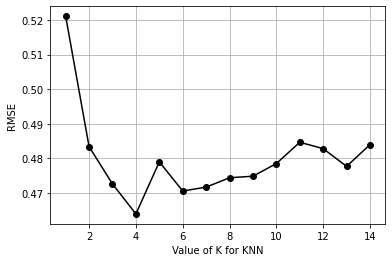

In [ ]:
k_range = range(1, 15)
rmse_err = []
for k in k_range:
    model = KNeighborsRegressor(n_neighbors=k, metric='euclidean')    
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
    RMSE = sqrt(mean(absolute(scores)))
    rmse_err.append(RMSE) 
    print('RMSE value for k= ' , k , 'is:', RMSE)
plt.plot(k_range, rmse_err, '-ok')
plt.xlabel('Value of K for KNN')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


#Performance Measure

In [ ]:
#akurasi RMSE
model = KNeighborsRegressor(n_neighbors=4, metric='euclidean')
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)    
sqrt(mean(absolute(scores)))

0.46398036356916844

# Model terbaik

In [ ]:
model = KNeighborsRegressor(n_neighbors=4, metric='euclidean')
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

# Prediksi Penjualan

In [ ]:
y_pred = model.predict(x_tes)
y_pred
dft['prediksi'] = y_pred
dft

,bln-1,bln-2,bln-3,bln-4,bln-5,bln-6,bln-7,bln-8,bln-9,bln-10,bln-11,bln-12,prediksi
0,80,77,90,73,84,74,93,86,80,87,82,82,0.937500
1,77,90,73,84,74,93,86,80,87,82,82,91,0.536458
2,90,73,84,74,93,86,80,87,82,82,91,45,0.588542
3,73,84,74,93,86,80,87,82,82,91,45,45,0.739583
4,84,74,93,86,80,87,82,82,91,45,45,57,0.744792
5,74,93,86,80,87,82,82,91,45,45,57,62,0.567708
6,93,86,80,87,82,82,91,45,45,57,62,51,0.437500
7,86,80,87,82,82,91,45,45,57,62,51,71,0.473958
8,80,87,82,82,91,45,45,57,62,51,71,69,0.390625
9,87,82,82,91,45,45,57,62,51,71,69,69,0.390625


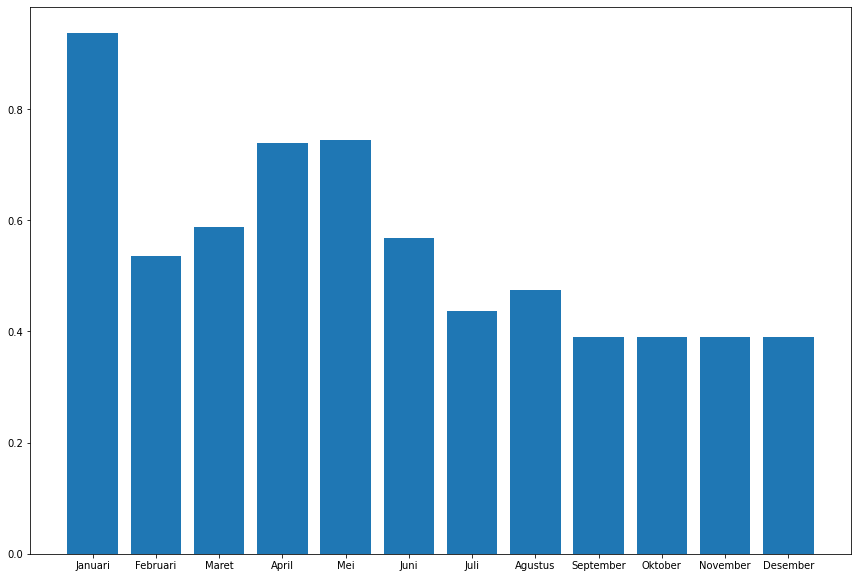

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.9,1.9])
Prediksi = np.array(dft['prediksi'])
Bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

ax.bar(Bulan,Prediksi)
plt.show()